In [261]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [495]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [499]:
data = pd.read_csv('Rice_Osmancik_Cammeo_Dataset.csv')

In [501]:
data.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [505]:
data['CLASS'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [507]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['CLASS'] = encoder.fit_transform(data['CLASS'])
print(data['CLASS'].unique())

[0 1]


In [457]:
#slice our data into input and output

x = data.iloc[:, [0,1,2,3,4,5,6]].values
y = data.iloc[:, 7].values

In [459]:
# spilitting the dataset into the training and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [509]:
data['CLASS'].value_counts()

CLASS
1    2180
0    1630
Name: count, dtype: int64

In [511]:
# balancing Data
class_weights = {0: 0.874, 1: 1.169}

In [513]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [515]:
# build the model (using sigmond activation for binary problem)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, activation='relu', input_shape=(7,)))
model.add(tf.keras.layers.Dense(8,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

C:\Users\alimo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [517]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [519]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [437]:
# training data
history = model.fit(x_train, np.asarray(y_train),\
                    batch_size = 32, epochs = 30,\
                    verbose = 2, class_weight=class_weights,\
                    validation_split=0.2)

Epoch 1/30
77/77 - 3s - 35ms/step - accuracy: 0.7847 - loss: 0.6715 - val_accuracy: 0.8951 - val_loss: 0.5507
Epoch 2/30
77/77 - 0s - 3ms/step - accuracy: 0.9081 - loss: 0.4755 - val_accuracy: 0.9066 - val_loss: 0.3697
Epoch 3/30
77/77 - 0s - 3ms/step - accuracy: 0.9159 - loss: 0.3180 - val_accuracy: 0.9115 - val_loss: 0.2652
Epoch 4/30
77/77 - 0s - 3ms/step - accuracy: 0.9208 - loss: 0.2448 - val_accuracy: 0.9213 - val_loss: 0.2224
Epoch 5/30
77/77 - 0s - 3ms/step - accuracy: 0.9237 - loss: 0.2150 - val_accuracy: 0.9180 - val_loss: 0.2032
Epoch 6/30
77/77 - 0s - 3ms/step - accuracy: 0.9249 - loss: 0.2029 - val_accuracy: 0.9230 - val_loss: 0.1952
Epoch 7/30
77/77 - 0s - 4ms/step - accuracy: 0.9253 - loss: 0.1972 - val_accuracy: 0.9279 - val_loss: 0.1919
Epoch 8/30
77/77 - 0s - 3ms/step - accuracy: 0.9253 - loss: 0.1944 - val_accuracy: 0.9279 - val_loss: 0.1903
Epoch 9/30
77/77 - 0s - 3ms/step - accuracy: 0.9258 - loss: 0.1928 - val_accuracy: 0.9262 - val_loss: 0.1893
Epoch 10/30
77/77 

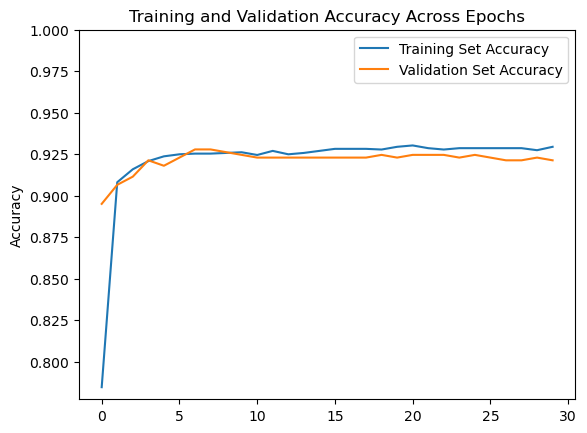

In [521]:
# Training and Validation Accuracy Analysis

accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

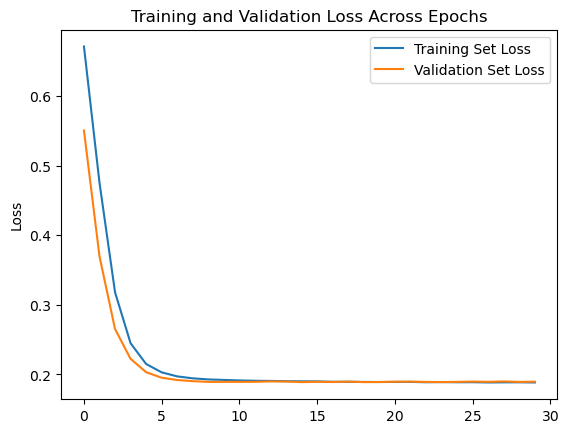

In [441]:
# Training and Validation Loss Analysis

loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss,label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

In [443]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [444]:
print(y_pred[:10])

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


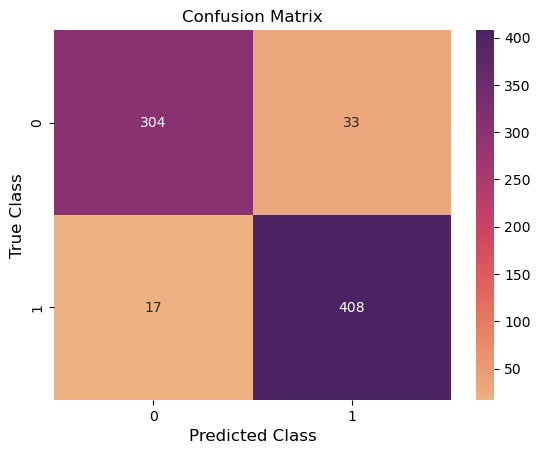

In [523]:
# confusion matrix 

confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

In [449]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       337
           1       0.93      0.96      0.94       425

    accuracy                           0.93       762
   macro avg       0.94      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

